Quantum Teleportation

In [1]:
from qiskit import *

Bernstein-Vazirani algorithm

In [21]:
secret_number = "1011"

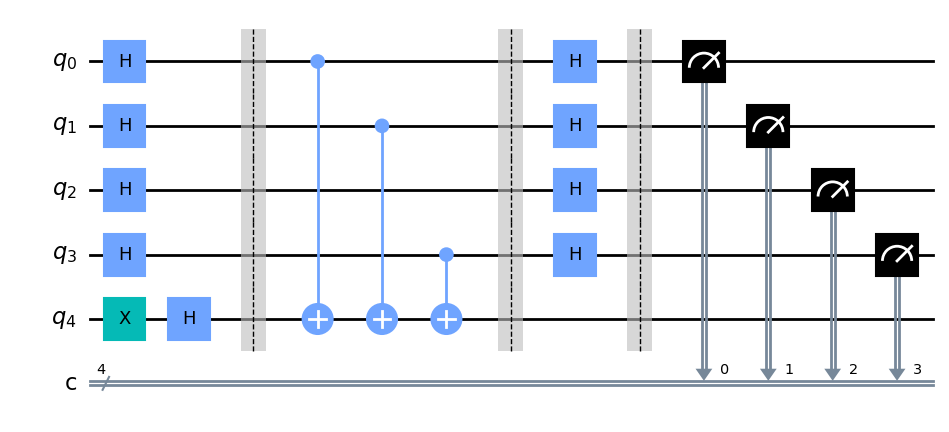

In [22]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

# circuit.h([0,1,2,3,4,5])
# circuit.x(6)
# circuit.h(6)
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()

# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)

for li, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(li, len(secret_number))


circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))

circuit.barrier()

circuit.measure(range(len(secret_number)), range(len(secret_number)))


circuit.draw("mpl")

In [25]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, simulator, shots=1).result()
counts = result.get_counts()
print(counts)
# plot_histogram(counts)

{'1011': 1}
